In [1]:
import json
import pandas as pd

coffee_json_path = 'Resources/coffee-consumption-by-country-2023.json'
heart_disease_json_path = 'Resources/heart-disease-rates-by-country-2023.json'

with open(coffee_json_path, 'r') as coffee_file:
    coffee_data = json.load(coffee_file)

with open(heart_disease_json_path, 'r') as heart_disease_file:
    heart_disease_data = json.load(heart_disease_file)


In [2]:
# make datasets into dataframes
# only keey pop2023,subregion,landAreaKm,coffeeConsumptionByCountry_totCons2019,coffeeConsumptionByCountry_perCapitaCons2016
# make country as index
# rename columns
coffee_data_df = pd.DataFrame(coffee_data)
coffee_data_df = coffee_data_df[['country','pop2023','subregion','landAreaKm','coffeeConsumptionByCountry_totCons2019','coffeeConsumptionByCountry_perCapitaCons2016']]
coffee_data_df = coffee_data_df.set_index('country')
coffee_data_df = coffee_data_df.rename(columns={'pop2023':'Population 2023','subregion':'Subregion','landAreaKm':'Land Area (km^2)','coffeeConsumptionByCountry_totCons2019':'Total Coffee Consumption (kg)','coffeeConsumptionByCountry_perCapitaCons2016':'Coffee Consumption Per Capita (kg)'})
coffee_data_df.head()


,Population 2023,Subregion,Land Area (km^2),Total Coffee Consumption (kg),Coffee Consumption Per Capita (kg)
country,,,,,
United States,339996563,Northern America,9147420.0,27310.0,9.26
Brazil,216422446,"[South America, Latin America]",8358140.0,NaN,12.79
Russia,144444359,Eastern Europe,16376870.0,4820.0,NaN
Japan,123294513,Eastern Asia,364500.0,7551.0,NaN
Germany,83294633,Western Europe,349390.0,8670.0,12.13


In [3]:
print(coffee_data_df.shape)

(39, 5)


In [4]:
# make datasets into dataframes
# only keep country,pop2023,region,landAreaKm,HeartDiseaseRateDeathsPer100kPopulation2019	HeartDiseaseRateDeathsPer100kPopulation1990	HeartDiseaseRateDeathsPer100kPopulationAbsoluteChange	HeartDiseaseRateDeathsPer100kPopulationRelativeChange19902019	HeartDiseaseRateDeathsPer100kFemales	HeartDiseaseRateDeathsPer100kMales
# make country as index
# rename long columns to short
heart_disease_data_df = pd.DataFrame(heart_disease_data)
heart_disease_data_df = heart_disease_data_df[['country','pop2023','region','landAreaKm','HeartDiseaseRateDeathsPer100kPopulation2019','HeartDiseaseRateDeathsPer100kPopulation1990','HeartDiseaseRateDeathsPer100kPopulationAbsoluteChange','HeartDiseaseRateDeathsPer100kPopulationRelativeChange19902019','HeartDiseaseRateDeathsPer100kFemales','HeartDiseaseRateDeathsPer100kMales']]
heart_disease_data_df = heart_disease_data_df.set_index('country')
heart_disease_data_df = heart_disease_data_df.rename(columns={'HeartDiseaseRateDeathsPer100kPopulation2019':'HDP100KPop2019','HeartDiseaseRateDeathsPer100kPopulation1990':'HDP100KPop1990','HeartDiseaseRateDeathsPer100kPopulationAbsoluteChange':'HDP100KPopAbsChange','HeartDiseaseRateDeathsPer100kPopulationRelativeChange19902019':'HDP100KPopRelChange','HeartDiseaseRateDeathsPer100kFemales':'HDP100KPopFemales','HeartDiseaseRateDeathsPer100kMales':'HDP100KPopMales'})
heart_disease_data_df


,pop2023,region,landAreaKm,HDP100KPop2019,HDP100KPop1990,HDP100KPopAbsChange,HDP100KPopRelChange,HDP100KPopFemales,HDP100KPopMales
country,,,,,,,,,
India,1.428628e+09,Asia,2973190.0,256.37,332.83,-76.46,-23.00,NaN,NaN
China,1.425671e+09,Asia,9424702.9,276.94,381.21,-104.27,-27.00,NaN,NaN
United States,3.399966e+08,North America,9147420.0,157.01,264.64,-107.63,-41.00,259.6,292.2
Indonesia,2.775341e+08,Asia,1877519.0,383.26,340.46,42.80,0.13,NaN,NaN
Pakistan,2.404857e+08,Asia,770880.0,357.88,329.39,28.49,0.09,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Cook Islands,1.704400e+04,Oceania,240.0,248.25,373.69,-125.44,-34.00,NaN,NaN
Nauru,1.278000e+04,Oceania,20.0,637.73,656.75,-19.02,-3.00,NaN,NaN
Tuvalu,1.139600e+04,Oceania,30.0,471.21,546.95,-75.74,-14.00,NaN,NaN


In [5]:
# merge two dataframes to the left
coffee_heart_disease_df = pd.merge(coffee_data_df,heart_disease_data_df,how='left',on='country')
coffee_heart_disease_df.head()

,Population 2023,Subregion,Land Area (km^2),Total Coffee Consumption (kg),Coffee Consumption Per Capita (kg),pop2023,region,landAreaKm,HDP100KPop2019,HDP100KPop1990,HDP100KPopAbsChange,HDP100KPopRelChange,HDP100KPopFemales,HDP100KPopMales
country,,,,,,,,,,,,,,
United States,339996563,Northern America,9147420.0,27310.0,9.26,339996563.0,North America,9147420.0,157.01,264.64,-107.63,-41.0,259.6,292.2
Brazil,216422446,"[South America, Latin America]",8358140.0,NaN,12.79,216422446.0,South America,8358140.0,175.66,355.35,-179.69,-51.0,155.8,181.2
Russia,144444359,Eastern Europe,16376870.0,4820.0,NaN,144444359.0,Europe,16376870.0,432.92,569.49,-136.57,-24.0,567.9,579.3
Japan,123294513,Eastern Asia,364500.0,7551.0,NaN,123294513.0,Asia,364500.0,77.01,189.27,-112.26,-59.0,280.7,278.1
Germany,83294633,Western Europe,349390.0,8670.0,12.13,83294633.0,Europe,349390.0,159.36,346.04,-186.68,-54.0,428.3,384.0


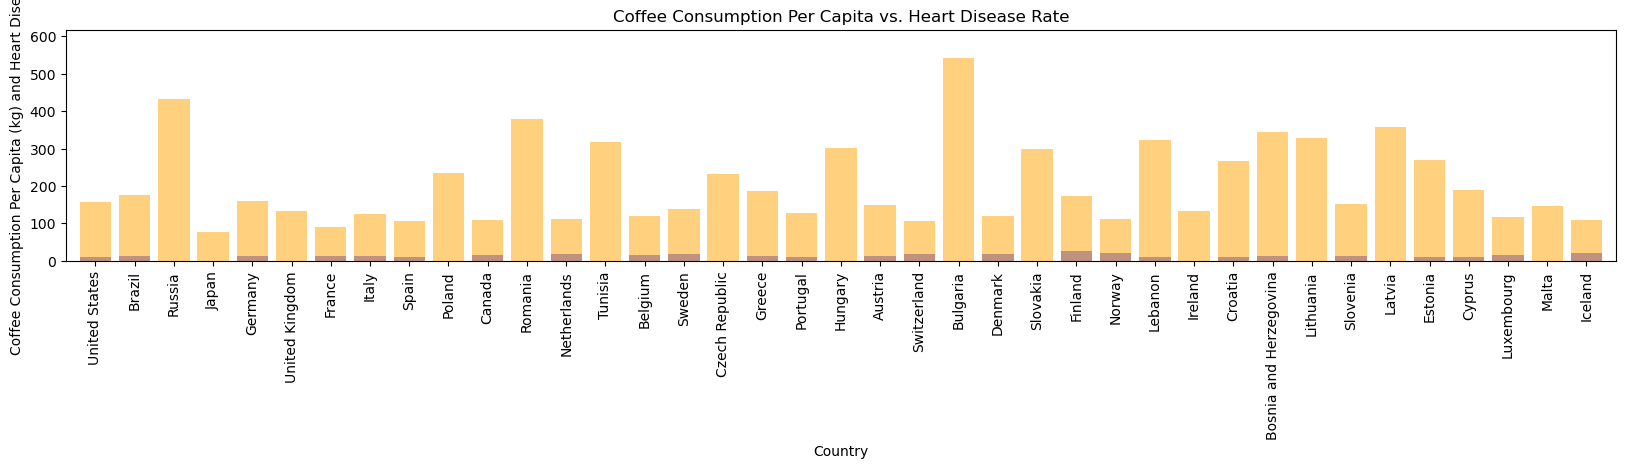

In [6]:
# make a bar chart, x axis is country, y axis is coffee consumption per capita and heart disease rate
# coffee consumption per capita is blue bar, heart disease rate is orange bar
# save the figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_axis = np.arange(len(coffee_heart_disease_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis,coffee_heart_disease_df['Coffee Consumption Per Capita (kg)'],color='b',alpha=0.5,align='center')
plt.bar(x_axis,coffee_heart_disease_df['HDP100KPop2019'],color='orange',alpha=0.5,align='center')
plt.xticks(tick_locations,coffee_heart_disease_df.index,rotation='vertical')
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(coffee_heart_disease_df['Coffee Consumption Per Capita (kg)']+max(coffee_heart_disease_df['HDP100KPop2019']))+50)
plt.title('Coffee Consumption Per Capita vs. Heart Disease Rate')
plt.xlabel('Country')
plt.ylabel('Coffee Consumption Per Capita (kg) and Heart Disease Rate')
plt.show()


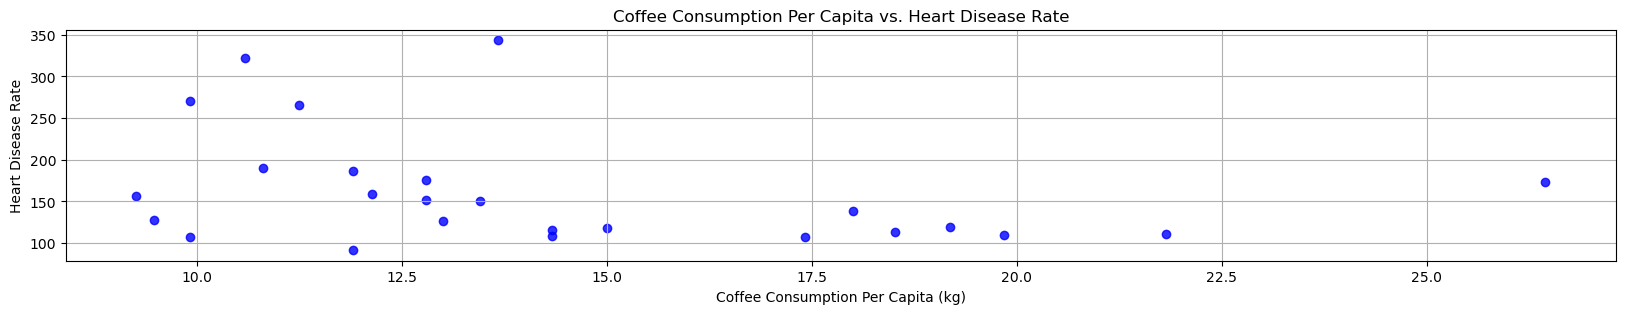

In [7]:
# make a scatter plot, x axis is coffee consumption per capita, y axis is heart disease rate
# add grid
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(20,3))
plt.scatter(coffee_heart_disease_df['Coffee Consumption Per Capita (kg)'],coffee_heart_disease_df['HDP100KPop2019'],marker='o',color='b',alpha=0.8)
plt.grid()
plt.title('Coffee Consumption Per Capita vs. Heart Disease Rate')
plt.xlabel('Coffee Consumption Per Capita (kg)')
plt.ylabel('Heart Disease Rate')
plt.show()



In [8]:
# Dependencies
from census import Census
from config import census_key
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")
geoapify_key = 'b80a2ddc1c8144749f1b9bc9fe9a4196'


In [9]:
#get the latitude and longitude of each country
lat = []
lng = []

for index,row in coffee_heart_disease_df.iterrows():
    country = index
    url = f'https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={geoapify_key}'
    response = requests.get(url).json()
    lat.append(response['features'][0]['properties']['lat'])
    lng.append(response['features'][0]['properties']['lon'])
    
coffee_heart_disease_df['Latitude'] = lat
coffee_heart_disease_df['Longitude'] = lng
coffee_heart_disease_df.head()

,Population 2023,Subregion,Land Area (km^2),Total Coffee Consumption (kg),Coffee Consumption Per Capita (kg),pop2023,region,landAreaKm,HDP100KPop2019,HDP100KPop1990,HDP100KPopAbsChange,HDP100KPopRelChange,HDP100KPopFemales,HDP100KPopMales,Latitude,Longitude
country,,,,,,,,,,,,,,,,
United States,339996563,Northern America,9147420.0,27310.0,9.26,339996563.0,North America,9147420.0,157.01,264.64,-107.63,-41.0,259.6,292.2,39.783730,-100.445882
Brazil,216422446,"[South America, Latin America]",8358140.0,NaN,12.79,216422446.0,South America,8358140.0,175.66,355.35,-179.69,-51.0,155.8,181.2,-10.333333,-53.200000
Russia,144444359,Eastern Europe,16376870.0,4820.0,NaN,144444359.0,Europe,16376870.0,432.92,569.49,-136.57,-24.0,567.9,579.3,64.686314,97.745306
Japan,123294513,Eastern Asia,364500.0,7551.0,NaN,123294513.0,Asia,364500.0,77.01,189.27,-112.26,-59.0,280.7,278.1,36.574844,139.239418
Germany,83294633,Western Europe,349390.0,8670.0,12.13,83294633.0,Europe,349390.0,159.36,346.04,-186.68,-54.0,428.3,384.0,51.163818,10.447831


In [10]:
# use the latitude and longitude to draw a map
coffee_map = coffee_heart_disease_df.hvplot.points(x='Longitude',
                                                   y='Latitude',
                                                   geo=True,
                                                   hover_cols=['Coffee Consumption Per Capita (kg)',
                                                               'HDP100KPop2019'],
                                                   tiles='OSM',
                                                   color='Coffee Consumption Per Capita (kg)',
                                                   size = 100,
                                                   width=800,
                                                   height=500)
coffee_map


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Coffee Consumption Per Capita (kg),HDP100KPop2019)